In [43]:
import pickle

with open('covtype3.pickle', 'rb') as f:
    covtype = pickle.load(f)

In [44]:
import sklearn

from sklearn import tree
my_tree = tree.DecisionTreeClassifier(random_state=0)
my_tree.fit(covtype['train_data'], covtype['train_labels'])

DecisionTreeClassifier(random_state=0)

# Implementation Questions

##### 6) What is the default criterion used to measure the quality of a split?

The default criterion is $criterion$ where $\textrm{default}=\textrm{"gini"}$.

The "gini" default implements the Gini impurity. The Gini impurity is just a generalization of the variance impurity.

$i(N) = \sum_{i \neq j} P(w_i)P(w_j) = 1 - \sum_j P^2 (w_j)$

##### 7) What is the default stopping criterion used by the learning algorithm?

The default stopping criterion is $min\_impurity\_decrease$ where $\textrm{default}=0.0$ (float).

Nodes will no longer be split (i.e. tree prunes) when nodes induce a decrease in impurity greater than or equal to the set threshold value.

##### 8) If you wanted to ensure that the learned decision tree does not have more than 20 leaf nodes, how would you change the call to the DecisionTreeClassifier constructor?

We can call the parameter $max\_leaf\_nodes$ where $max\_leaf\_nodes=20$.

# Performance Metrics

In [45]:
from sklearn.metrics import classification_report

print('Performance on training data')
print(classification_report(covtype['train_labels'],
  my_tree.predict(covtype['train_data']),
  target_names=covtype['class_names']))
print('Performance on test data')
print(classification_report(covtype['test_labels'],
  my_tree.predict(covtype['test_data']),
  target_names=covtype['class_names']))

Performance on training data
              precision    recall  f1-score   support

           1       1.00      1.00      1.00    164652
           2       1.00      1.00      1.00    218031
           3       1.00      1.00      1.00     33493
           4       1.00      1.00      1.00      8974
           5       1.00      1.00      1.00     13981
           6       1.00      1.00      1.00     19810
           7       1.00      1.00      1.00     22071

    accuracy                           1.00    481012
   macro avg       1.00      1.00      1.00    481012
weighted avg       1.00      1.00      1.00    481012

Performance on test data
              precision    recall  f1-score   support

           1       0.84      0.82      0.83     34044
           2       0.85      0.85      0.85     45223
           3       0.67      0.68      0.68      7023
           4       0.16      0.18      0.17      1867
           5       0.37      0.40      0.38      2935
           6       0.51 

##### 9) What is the training error rate of the learned decision tree my_tree?

$1.00 - \textrm{accuracy (training)} = 0.00$ where training accuracy is $1.00$

The training error rate is $0.00$.

##### 10) What is the test error rate of the learned decision tree my_tree?

$1.00 - \textrm{accuracy (testing)} = 0.22$ where training accuracy is $0.78$

The test error rate is $0.22$.

# Examining the Structure of the Learned Decision Tree

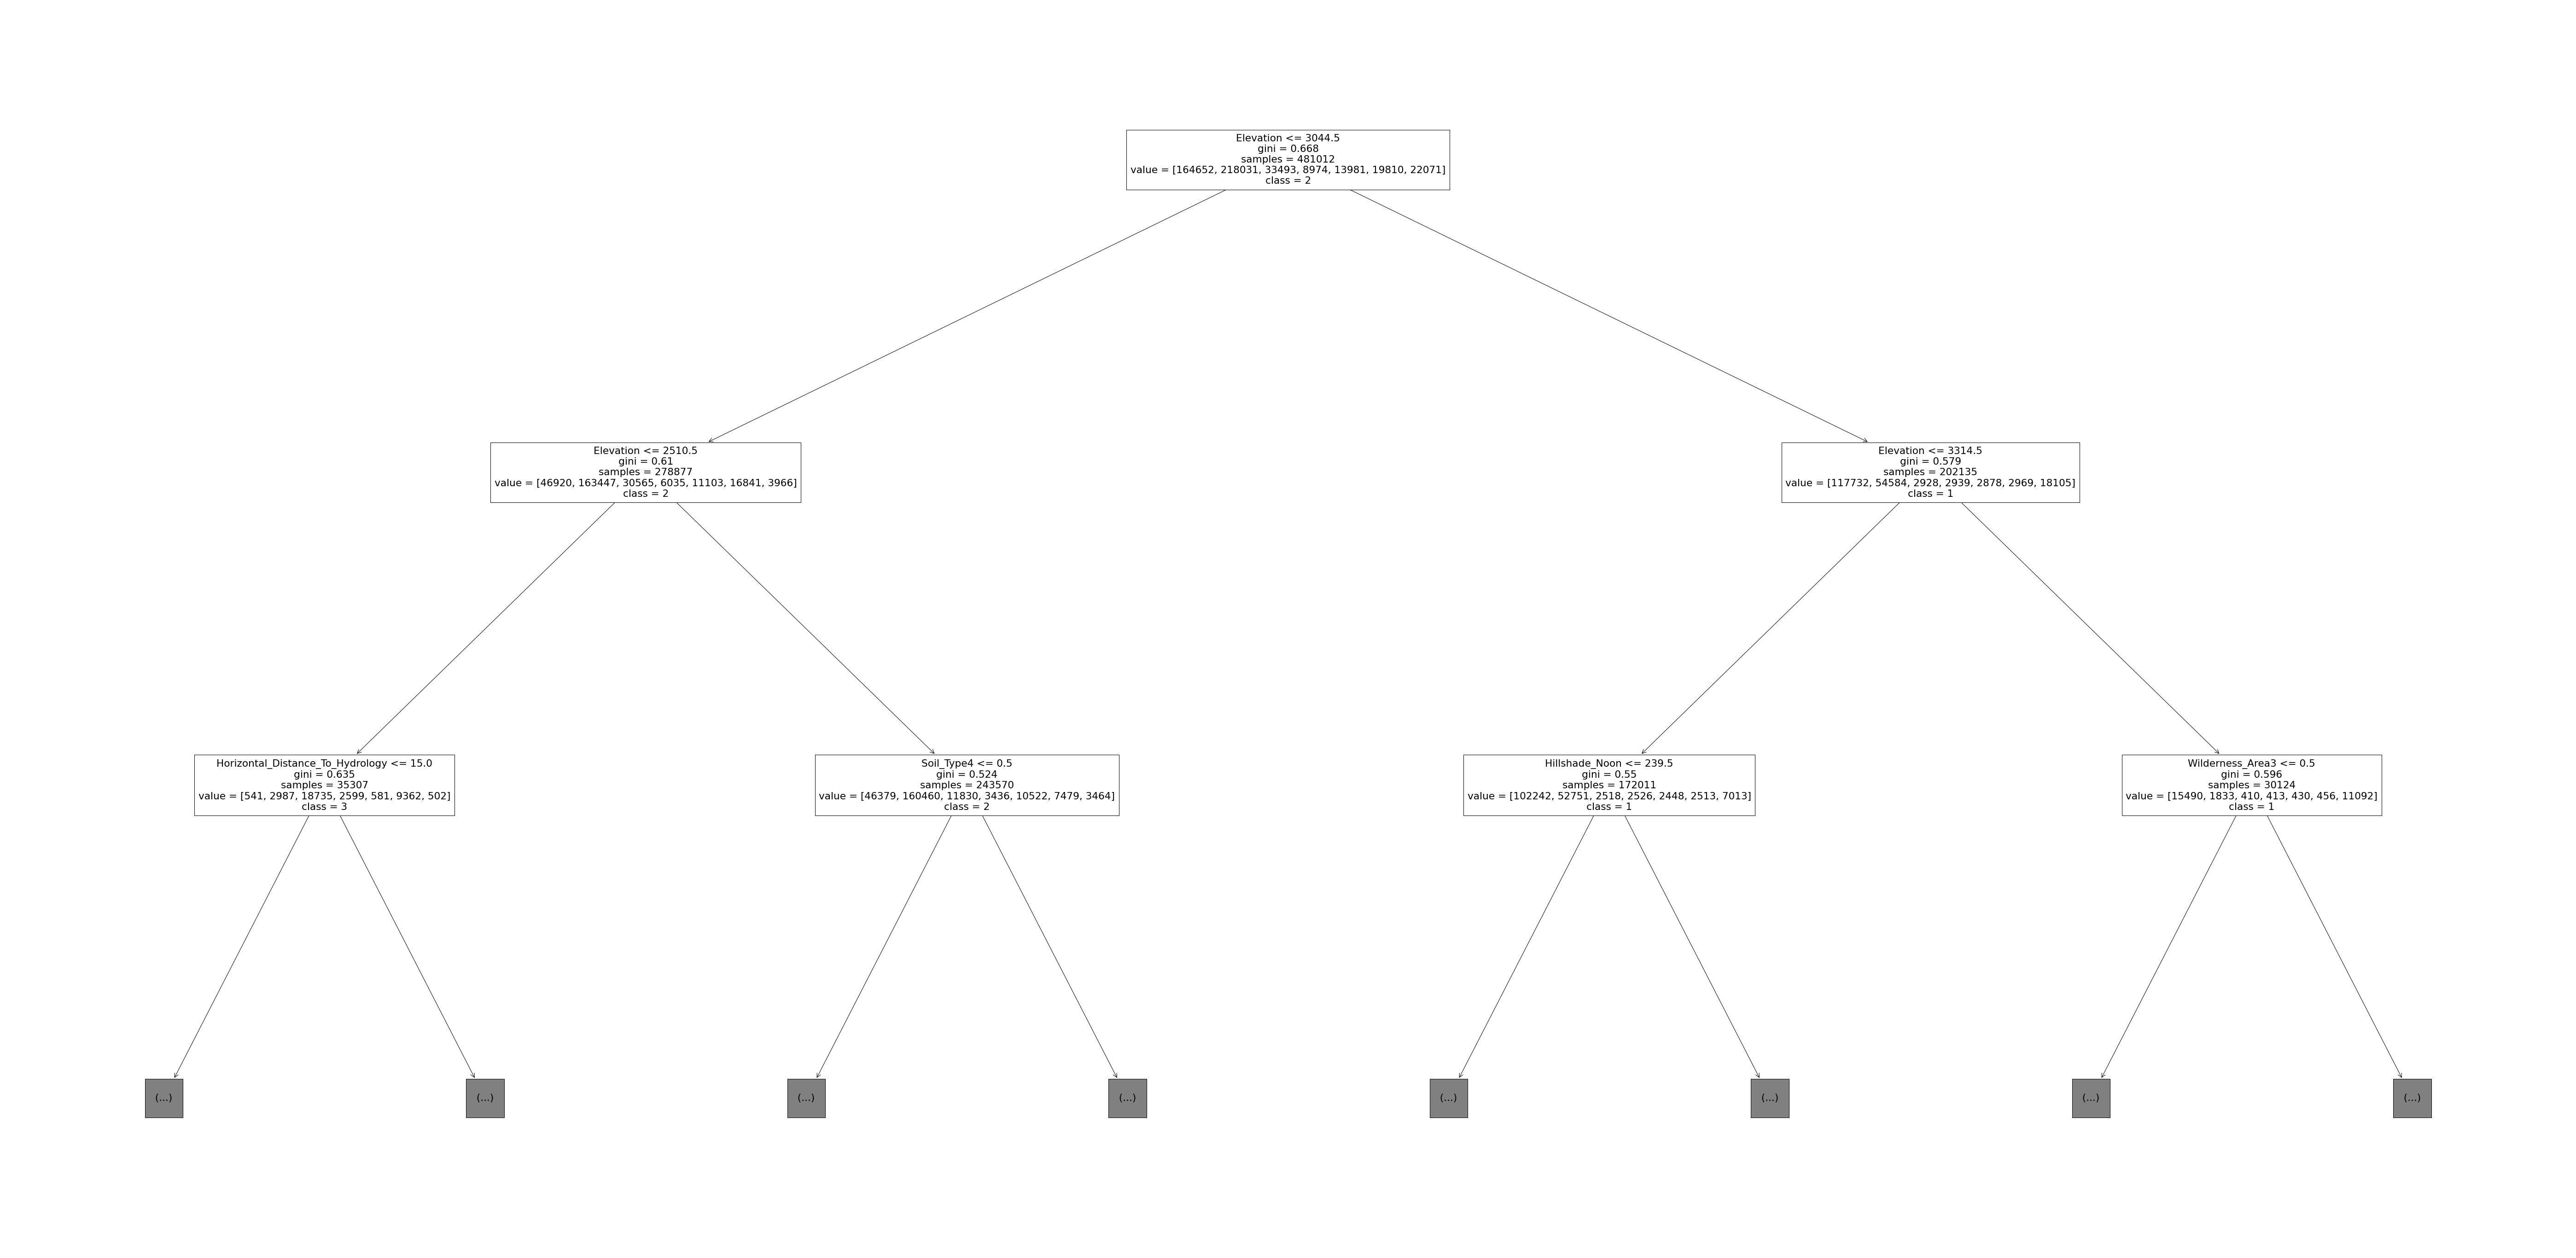

In [46]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(100, 50))
tree.plot_tree(my_tree,
               max_depth=2,
               class_names=covtype['class_names'],
               feature_names=covtype['feature_names'])
plt.show()

In [47]:
import numpy as np

node_depth = np.zeros(shape=my_tree.tree_.node_count, dtype=np.int64)
stack = [(0, 0)]

while len(stack) > 0:
    node_id, depth = stack.pop()
    node_depth[node_id] = depth
    
    if my_tree.tree_.children_left[node_id] != my_tree.tree_.children_right[node_id]:
        stack.append((my_tree.tree_.children_left[node_id], depth + 1))
        stack.append((my_tree.tree_.children_right[node_id], depth + 1))

##### 11) What is the maximum depth of the learned decision tree my_tree, and how many nodes are at that depth?

In [48]:
max_depth = max(node_depth)

print("The maximum depth of a node in our decision tree:", max_depth)

The maximum depth of a node in our decision tree: 63


##### 12) Which depth has the most number of nodes in my_tree?

In [49]:
print("The depth with the most number of nodes:", np.bincount(node_depth).argmax())

The depth with the most number of nodes: 22


In the above question, we can use other functions such as $statistics.mode()$ to find the most common element of a list, but I decided to treat $node\_depth$ strictly as an array and use $np.bincount$ to get the frequency of each node depth in the tree and then use $argmax()$ to find the most common frequency.

# Use Cross-Validation to Choose a Hyperparameter Value

In [50]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(covtype['train_data'], 
                                                  covtype['train_labels'], 
                                                  test_size=0.2, 
                                                  random_state=0)

###### 13) Use hold-out cross-validation to pick a value for the “maximum depth” hyperparameter. What is the chosen hyperparameter value?

In [72]:
from sklearn.metrics import accuracy_score

def decision_tree_model(X_training_data, y_training_data, X_testing_data, y_testing_data, n_depth):
    model = tree.DecisionTreeClassifier(random_state=0, 
                                        max_depth=n_depth)

    model = model.fit(X_training_data, y_training_data)
    training_pred = model.predict(X_training_data)
    testing_pred = model.predict(X_testing_data)
    
    training_acc = accuracy_score(y_training_data, training_pred)
    testing_acc = accuracy_score(y_testing_data, testing_pred)
    
    print("The training accuracy of the model with max depth", n_depth, "is:", "{:.3f}".format(training_acc))
    print("The testing accuracy of the model with max depth", n_depth, "is:", "{:.3f}".format(testing_acc))
    print()
    
    return (training_acc, testing_acc)

In [76]:
accuracy_vals = []
max_depth_vals = []

for n in range(5, 55, 5):
    acc = decision_tree_model(X_train, y_train, X_val, y_val, n)
    
    accuracy_vals.append(acc)
    max_depth_vals.append(n)


The training accuracy of the model with max depth 5 is: 0.646
The testing accuracy of the model with max depth 5 is: 0.650

The training accuracy of the model with max depth 10 is: 0.719
The testing accuracy of the model with max depth 10 is: 0.716

The training accuracy of the model with max depth 15 is: 0.799
The testing accuracy of the model with max depth 15 is: 0.772

The training accuracy of the model with max depth 20 is: 0.883
The testing accuracy of the model with max depth 20 is: 0.801

The training accuracy of the model with max depth 25 is: 0.944
The testing accuracy of the model with max depth 25 is: 0.800

The training accuracy of the model with max depth 30 is: 0.977
The testing accuracy of the model with max depth 30 is: 0.787

The training accuracy of the model with max depth 35 is: 0.991
The testing accuracy of the model with max depth 35 is: 0.777

The training accuracy of the model with max depth 40 is: 0.997
The testing accuracy of the model with max depth 40 is: 0

We can see here that after about a max depth of 20, the testing accuracy levels off and even dips, while the training accuracy grows. Thus, the model starts to overfit our data. We can choose our hyperparameter as $max\_depth=20$.

##### 14) Use matplotlib to plot the validation accuracy (or validation error rate, if you prefer) as a function of the “maximum depth” hyperparameter value. Label the axes of the plot and give the plot an appropriate title.

In [77]:
import matplotlib.pyplot as plt

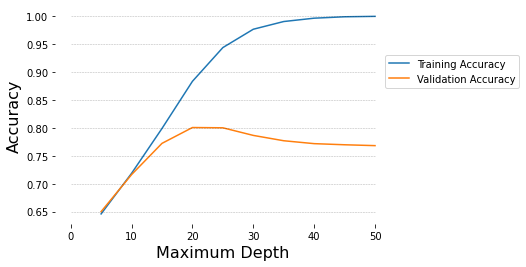

In [108]:
fig, ax = plt.subplots()

ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)



plt.plot(max_depth_vals, accuracy_vals);

for i in range(8):
    grid_val = i * 0.05 +0.65
    plt.plot([0, 50], 
             [grid_val, grid_val],
             '--',
             c='black',
             lw=0.5,
             alpha=0.3)

plt.ylabel('Accuracy', fontsize=16)
plt.xlabel('Maximum Depth', fontsize=16)
ax.legend(['Training Accuracy','Validation Accuracy'], loc='upper right', bbox_to_anchor=(1.4, 0.8))

Here, I've labeled the axes accordingly and also included training accuracy as a function of maximum depth so that we have a direct comparison of training and validation accuracy.

##### 15) Now use the value for the “maximum depth” hyperparameter chosen in Problem 13 to learn another decision tree, using the entirety of the training data (covtype['train_data'] and covtype['train_labels'], not just X_train and y_train). What is the test error rate of this new learned decision tree?

In [110]:
decision_tree_model(covtype['train_data'], covtype['train_labels'], covtype['test_data'], covtype['test_labels'], 20)

The training accuracy of the model with max depth 20 is: 0.881
The testing accuracy of the model with max depth 20 is: 0.806



(0.881275311218847, 0.8058)

The test error rate of our model is $1.00 - 0.806 = 0.194$